<a href="https://colab.research.google.com/github/LCaravaggio/politext/blob/main/GS%20-%20Orden%20del%20dia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar la base

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
base=pd.read_csv('/content/drive/MyDrive/base_formateada.csv')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Se incorporan las stopwords sugeridas por Federico
stopwords.extend(['señor', 'señora', 'mucha', 'gracia', 'año', 'pasado', 'cada', 'vez', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis' ,'siete', 'ocho', 'nueve', 'diez'])
stopwords.extend(['hoy', 'aquí', 'primer', 'lugar', 'primera', 'segunda', 'primero', 'segundo', 'siguiente', 'tercer'])
stopwords.extend(['convergencia', 'esquerra', 'republicana', 'grupo', 'parlamentaria', 'parlamentario', 'partido'])
stopwords.extend(['enmienda', 'votación', 'favor', 'abstención', 'ley', 'real', 'decreto', 'decretoley', 'resultado', 'voto', 'sé' ,'sí', 'silencio' ,'favor'])
stopwords.extend(['usted', 'señoría', 'presidente', 'presidenta', 'ministro', 'orden' , 'día', 'palabra', 'petición', 'posición', 'punto', 'vista', 'sesión', 'baldoví', 'duran', 'turno'])
stopwords.extend(['hacer', 'frente', 'puede' ,'ser', 'va', 'voy', 'decir'])
stopwords.extend(['millón', 'euro', 'emitido', 'efectuada', 'dio', 'comienzo', 'partido', 'queda', 'quedan', 'rechazada', 'aceptada', 'comienza', 'usted', 'sabe', 'abstención', 'diputado', 'gobierno'])
stopwords.extend(['continuación', 'votamos', 'telemático', 'republicanaizquierda', 'unidainiciativa', 'puede', 'bien', 'propuesta' ,'abstencion', 'mayoría', 'absoluta', 'pregunta', 'don', 'vamos', 'votar', 'llevar', 'cabo', 'millón', 'muchas', 'gracias'])
stopwords.extend(['podemosen', 'podemen', 'ministro', 'ministra', 'ss', 'ruego', 'aprobado', 'aprobada'])
stopwords.extend(['diputado', 'diputada', 'don', 'doña', 'vicepresidenta', 'sagastizab', 'unzetabarrenetxea', 'agirretxea', 'urresti', 'escrutinio', 'dijo', 'dice', 'quevedo'])
stopwords.extend(['campuzano', 'beitialarrangoitia', 'gonzalezmoro', 'mixto'])

In [5]:
# Se incorporan los nombres de los oradores como stopwords
from collections import Counter
nombres=[]
for i in base.namey.unique().tolist(): nombres.extend(str(i).split(' '))
nombres = [x.strip(' ') for x in nombres]
nombres = [x.strip(' †') for x in nombres]
nombres = [x.strip(',') for x in nombres]
nombres=list(Counter(nombres))
nombres.remove('')

In [6]:
stopwords.extend(nombres)

In [7]:
partidos=pd.read_csv('/content/drive/MyDrive/partidos.csv', encoding='latin1', sep=';')

In [8]:
for x in partidos['nombre'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(str(a).split())
  stopwords.extend(a)

for x in partidos['1'].unique():
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

for x in partidos['2'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

for x in partidos['3'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

In [9]:
len(stopwords)

4481

In [10]:
# elimino acentos de los tokens
a,b = 'áàéèíóúü','aaeeiouu'
trans = str.maketrans(a,b)
list = []
for row in base.values:
    row[20]=row[20].translate(trans)
    list.append(row)

base = pd.DataFrame(list, columns=base.columns)

In [11]:
# llevo las stopwords a minúsculas y elimino acentos
stopwords=[x.lower() for x in stopwords if type(x)==str]
stopwords=[x.translate(trans) for x in stopwords if type(x)==str]

# Mencionadas en al menos 10 discursos
(spoken in at least 10 unique speaker-session)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(2,2), stop_words=stopwords , min_df=10)
bow = vect.fit_transform(base['tokens'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ahuja', 'alcañiz', 'amor', 'arreciado', 'barcena', 'barnuevo', 'capel', 'capitan', 'cascos', 'castejon', 'cienfuegos', 'compromis', 'congr', 'escandon', 'estefani', 'figueroa', 'fortun', 'hickman', 'huarte', 'jeltzalea', 'jovellanos', 'lasquetty', 'latorre', 'legaz', 'lersundi', 'llin', 'machuca', 'maillo', 'mancisidor', 'margallo', 'maribona', 'marlaska', 'medel', 'menchero', 'mendicoa', 'na', 'olivares', 'patxi', 'peces', 'pedrero', 'pinilla', 'piñero', 'ponga', 'pujalte', 'salmones', 'santesmases', 'sito', 'soro', 'sotelo', 'tagle', 'tesorero', 'tizon', 'toledano', 'torrecilla', 'trevijano', 'valdecasas', 'valdes', 'vargas', 'villaseñor', 'ximo', 'yañez'] not in stop_words.
  warnings.warn(


In [13]:
total_features = len(vect.vocabulary_)

# Mencionadas al menos 100 veces en total
(spoken at least 100 times across al sessions)

In [14]:
new_voc={}
for token in vect.vocabulary_: 
  if vect.vocabulary_[token]>100:
    new_voc[token]=vect.vocabulary_[token]

In [15]:
len(new_voc)

270231

# Mencionadas al menos 10 veces en un día
(spoken at least 10 times in at least one session)

In [16]:
# Gentzkow et.al. usan mencionadas al menos 10 veces en una "sesión". Acá se usa mencionadas al menos 10 veces en un "día". 

new_voc2={}
vect = CountVectorizer(ngram_range=(2,2), stop_words=stopwords)
for x in base.fecha.unique(): 
  base_dia=base[pd.DatetimeIndex(base.fecha)==x]
  try: 
    bow = vect.fit_transform(base_dia['tokens'])
    for token in vect.vocabulary_: 
      if vect.vocabulary_[token]>10:
        new_voc2[token]=vect.vocabulary_[token]
  except: pass

In [17]:
len(new_voc2)

7719234

# Combinación

In [18]:
inter=set(new_voc2).intersection(new_voc)

In [19]:
vect = CountVectorizer(ngram_range=(2,2), stop_words=stopwords ,vocabulary=inter)
bow = vect.fit_transform(base['tokens'])
total_features = len(vect.vocabulary_)

In [20]:
# La intersección genera un vocabulario de apenas 814 bigramas. 
total_features

270230

In [21]:
matrix = bow

# Ordenes del día

In [24]:
# Hay 28mil órdenes del día únicas
len(base.orden.unique())

28566

In [25]:
# Para un total de 334mil discursos
len(base)

334421

In [31]:
# Este es el listado de las 40 ordenes del día con más discursos, y su número de discursos.
base['orden'].value_counts()[:40]

VOTACIONES:                                                                                                                                                                             939
DICTAMENES DE COMISION SOBRE INICIATIVAS LEGISLATIVAS:  — PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA 1989                                                                838
PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA 1983                                                                                                                          738
-- PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA 1998 (Número                                                                                                               738
DICTÁMENES DE COMISIONES SOBRE INICIATIVAS LEGISLATIVAS. -PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA EL AÑO 2006.                                                        701
DICTÁMENES DE COMISIONES SOBRE INICIATIVAS LEGISLATIVAS. (CO

# Un LDA con más iterations y 30 topics

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=30, max_iter=50, learning_method='batch', learning_offset=50.,random_state=0)   

In [ ]:
lda.fit(matrix)

LatentDirichletAllocation(learning_offset=50.0, max_iter=50, n_components=30,
                          random_state=0)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
display_topics(lda, feature_names=vect.get_feature_names_out(), no_top_words=20)

Topic 1:
guardia civil , cuerpo seguridad , fuerza cuerpo , ministerio interior , fuerza seguridad , medio comunicacion , policia guardia , policia nacion , cuerpo nacion , nacion policia , relacion cort , policia judici , seguridad vial , censo elector , cuerpo fuerza , junta elector , consumo droga , trafico droga , seguridad publica , proteccion civil
Topic 2:
codigo penal , derecho humano , derecho libertad , derecho fundamental , articulo constitucion , ordenamiento juridico , codigo civil , articulo codigo , libertad expresion , medio comunicacion , enjuiciamiento crimin , ejercicio derecho , reforma codigo , seguridad vial , consejo europa , derecho fundament , derecho penal , audiencia nacion , defensa derecho , responsabilidad penal
Topic 3:
presupuesto general , proyecto presupuesto , presupuesto ministerio , organismo autonomo , gasto publico , incremento ciento , gasto corrient , administracion publica , ciento respecto , partida presupuestaria , economia hacienda , ciento 

In [ ]:
import numpy as np
from numpy import argsort
import statistics
from statistics import mode
from scipy.special import logsumexp
import scipy as sp

In [ ]:
def display_topics_frex(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(frex(model)):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
def frex(mod, w=0.7):
    log_beta = np.log(mod.components_)
    log_exclusivity = log_beta - logsumexp(log_beta, axis=0)
    exclusivity_ecdf = np.apply_along_axis(ecdf, 1, log_exclusivity)
    freq_ecdf = np.apply_along_axis(ecdf, 1, log_beta)
    out = 1. / (w / exclusivity_ecdf + (1 - w) / freq_ecdf)
    return out

def ecdf(arr):
    return sp.stats.rankdata(arr, method='max') / arr.size

In [ ]:
display_topics_frex(lda, feature_names=vect.get_feature_names_out(), no_top_words=20)

Topic 1:
guardia civil , cuerpo seguridad , fuerza cuerpo , policia guardia , policia nacion , cuerpo nacion , nacion policia , cuerpo fuerza , consumo droga , civil policia , turismo comunicacion , vigilancia aduanera , problema droga , director guardia , direccion policia , modelo polici , cuerpo policia , cuerpo guardia , policia local , funcionario policia
Topic 2:
codigo penal , reforma codigo , derecho penal , prision provision , pena muert , penal militar , justicia militar , tipo penal , privativa libertad , proyecto codigo , pena privativa , pena prision , fundamental libertad , clausula conciencia , codigo justicia , sancion penal , declaracion univers , penal materia , patria potestad , permanent revis
Topic 3:
gasto person , presupuesto seccion , presupuesto programa , transferencia corrient , presupuesto inici , presupuesto consolidado , conjunto presupuesto , urgent interpelacion , capitulo inversion , gasto funcionamiento , corrient servicio , capitulo gasto , presupuest

# LASSO por legislatura

In [ ]:
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
frex_df=pd.DataFrame(frex(lda))

In [ ]:
# Topic que presenta mayor FREX para cada bigrama
d = []
feature_names=vect.get_feature_names_out()
for n in enumerate(feature_names):
    d.append(
        {
            'N': n[0],
            'Bigrama': n[1],
            'Topic':  frex_df[n[0]].argsort()[9]
        }
    )

bi_topic_frex=pd.DataFrame(d)
bi_topic_frex.head(20)

,N,Bigrama,Topic
0,0,abierto competitivo,22
1,1,abierto comunidad,1
2,2,abierto consenso,18
3,3,abierto considerar,3
4,4,abierto cualquier,4
5,5,abierto debat,2
6,6,abierto dialogar,26
7,7,abierto dialogo,0
8,8,abierto dicho,11
9,9,abierto discusion,20


In [ ]:
# Relevancia de bigramas en la predicción por legislatura
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

tabla=[]
legislaturas=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII','VIII', 'IX', 'X', 'XI', 'XII','XIII']
n=5

macro=[]
weighted=[]

lr = LogisticRegression(penalty='l1', max_iter=50, solver='liblinear')
cv=CountVectorizer(ngram_range=[2,2], stop_words=stopwords ,vocabulary=inter)

for x in legislaturas: 
  try: 
    base_year=base[base.legislatura==x]
    X_train, X_test, y_train, y_test = train_test_split(base_year.loc[:, base_year.columns != 'party'], base_year['party'], test_size=0.33, random_state=42)
    train_matrix = vect.fit_transform(X_train['tokens'])
    test_matrix = vect.transform(X_test['tokens'])  
    lr.fit(train_matrix,y_train)
    predictions = lr.predict(test_matrix )
    macro.append(f1_score(predictions,y_test, average='macro'))
    weighted.append(f1_score(predictions,y_test, average='weighted'))
    s=lr.coef_[0]
    print(f"Legislatura: {x} - Most Frecuent Topic: {mode(bi_topic_frex['Topic'][argsort(s)])}")
    print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))
  except: 
    macro.append(np.nan)
    weighted.append(np.nan)    

Legislatura: I - Most Frecuent Topic: 25
+---------------------+--------------------+---------------------+---------------------+--------------------+
|   nombr centrista   |    duda ninguna    | articulo mantenida  |  libertad libertad  |   articulo pausa   |
| -3.5490828581682665 | -3.529689873618588 | -2.890094806415368  | -2.8048361625156693 | -2.650019610952798 |
|         19          |         13         |          4          |          4          |         16         |
| formacion politica  |   cualquier caso   | solucionar problema |    reunion junta    |   pasamo examen    |
|  2.173435654587356  | 2.187134722009388  |  2.261429000180524  |  2.57009079185584   | 2.7545625260807696 |
|         19          |         16         |         20          |          4          |         6          |
+---------------------+--------------------+---------------------+---------------------+--------------------+
Legislatura: II - Most Frecuent Topic: 25
+--------------------+---------------

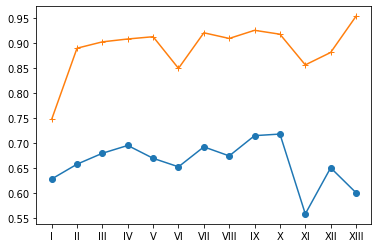

In [ ]:
# Yo entiendo que el resultado relevante es el macro, porque considera el desbalance de clases
import matplotlib.pyplot as plt
plt.plot(legislaturas, macro, marker='o')
plt.plot(legislaturas, weighted, marker='+')

# LASSO por año

In [ ]:
# Relevancia de bigramas en la predicción por año
macro=[]
weighted=[]
tabla=[]

nombres=cv.get_feature_names_out()
componentes=lda.components_.transpose()
n = 5
lr = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')

for x in range (1979, 2020): 
  try: 
    base_year=base[pd.DatetimeIndex(base.fecha).year==x]
    X_train, X_test, y_train, y_test = train_test_split(base_year.loc[:, base_year.columns != 'party'], base_year['party'], test_size=0.33, random_state=42)
    train_matrix = vect.fit_transform(X_train['tokens'])
    test_matrix = vect.transform(X_test['tokens'])  
    lr.fit(train_matrix,y_train)
    predictions = lr.predict(test_matrix )
    macro.append(f1_score(predictions,y_test, average='macro'))
    weighted.append(f1_score(predictions,y_test, average='weighted'))
    s = lr.coef_[0]
    print(f"Año: {x}")
    print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))
  except: 
    macro.append(np.nan)
    weighted.append(np.nan)  

Año: 1979
+----------------------+--------------------+--------------------+---------------------+---------------------+
|  publicada boletin   |  correspond ahora  |    misma razon     |      quier uso      | ultima intervencion |
| -2.5218990738169986  | -2.484730768320344 | -1.927122454354577 | -1.7392070088156875 | -1.7292375766944237 |
|          2           |         18         |         22         |         26          |         27          |
| ministerio educacion |  orador precedido  |    ningun tipo     | ministerio hacienda | formacion politica  |
|  0.9631667923531337  | 1.0052004720859211 | 1.0454232467083464 | 1.1904020253778183  | 1.9685194611315822  |
|          1           |         4          |         10         |         16          |         19          |
+----------------------+--------------------+--------------------+---------------------+---------------------+
Año: 1980
+---------------------+----------------------+---------------------+---------------------+--

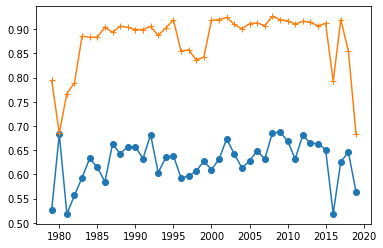

In [ ]:
# Yo entiendo que el resultado relevante es el macro, porque considera el desbalance de clases
import matplotlib.pyplot as plt
plt.plot(range(1979,2020), macro, marker='o')
plt.plot(range(1979,2020), weighted, marker='+')

# LASSO overall

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(base.loc[:, base_year.columns != 'party'], base['party'], test_size=0.33, random_state=42)
train_matrix = vect.fit_transform(X_train['tokens'])
test_matrix = vect.transform(X_test['tokens'])  
lr.fit(train_matrix,y_train)
predictions = lr.predict(test_matrix )
print(f1_score(predictions,y_test, average='macro'))
print(f1_score(predictions,y_test, average='weighted'))
s = lr.coef_[0]
print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))

0.6475387217556144
0.7020823929685404
+--------------------+--------------------+--------------------+--------------------+--------------------+
|  dirigida conform  |  termino derivado  |  pausa procedemo   |   numero formula   |  referido senado   |
| -4.563681677054712 | -4.495718308321066 | -4.467618083910903 | -4.313275449741695 | -4.286983575562812 |
|         1          |         10         |         6          |         19         |         1          |
|   seccion pausa    |    fijar pausa     |  turismo comercio  |      cd pausa      |  confeder podemo   |
|  4.33726717396521  |  4.52381138588459  | 4.564551166688844  | 4.824276187524637  | 4.919688887474812  |
|         25         |         4          |         6          |         18         |         24         |
+--------------------+--------------------+--------------------+--------------------+--------------------+


# Topic por discurso por weight

In [ ]:
base.shape

(334421, 21)

In [ ]:
matrix

<334421x270230 sparse matrix of type '<class 'numpy.int64'>'
	with 8479733 stored elements in Compressed Sparse Row format>

In [ ]:
lda.components_.shape

(30, 270230)

In [ ]:
disc_weights=matrix*lda.components_.transpose()

In [ ]:
base['Topic_weight']=disc_weights.argmax(axis=1)+1

In [ ]:
base.head()

,Unnamed: 0,orden,namex,intervention,fecha,legislatura,pleno,role,oradorx,namey,...,congreso,senado,total,oradory,cataluna,estatut,inter_raw,partido,tokens,Topic_weight
0,0,"LECTURA DEL REAL DECRETO. DE CONVOCATORIA, DE ...",PRESIDENTE PROVISIONAL (Fraile Poujade),"Señoras y señores Diputados, se abre la sesió...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,"4 (C, I, II, III)",–,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['señora', 'señor', 'diputado', 'abr', 'junta'...",9
1,1,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL,(Fraile Poujade): Según la relación que cons....,23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,"4 (C, I, II, III)",–,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['frail', 'poujad', 'segun', 'relacion', 'con'...",26
2,2,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL (Rodríguez Valverde),"Siguiendo el orden del día, ruego al señor Es...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,"6 (C, I, II, III, IV, V)",–,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['siguiendo', 'ruego', 'esperabe', 'arteaga', ...",13
3,3,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Ro.dríguez Valverde),"Al reanudarse la sesión, procedería dar lectu...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RO.DRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,"6 (C, I, II, III, IV, V)",–,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['reanudars', 'procederia', 'dar', 'lectura', ...",1
4,4,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Rodríguez Valverde),Una vez leído el informe de la Junta Electora...,23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,"6 (C, I, II, III, IV, V)",–,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['leido', 'inform', 'junta', 'elector', 'centr...",1


# Topic por discurso por frex

In [ ]:
import scipy as sp
from scipy.special import logsumexp
import numpy as np

In [ ]:
def frex(mod, w=0.7):
    log_beta = np.log(mod.components_)
    log_exclusivity = log_beta - logsumexp(log_beta, axis=0)
    exclusivity_ecdf = np.apply_along_axis(ecdf, 1, log_exclusivity)
    freq_ecdf = np.apply_along_axis(ecdf, 1, log_beta)
    out = 1. / (w / exclusivity_ecdf + (1 - w) / freq_ecdf)
    return out

In [ ]:
def ecdf(arr):
    return sp.stats.rankdata(arr, method='max') / arr.size

In [ ]:
def t_FREX(row):
  return frex_df[matrix[row['id']].argmax()].argsort()[9]

In [ ]:
frex_df=pd.DataFrame(frex(lda))
frex_df

,0,1,2,3,4,5,6,7,8,9,...,270220,270221,270222,270223,270224,270225,270226,270227,270228,270229
0,0.275483,0.345724,0.206564,0.658635,0.899360,0.891731,0.971789,0.024197,0.631680,0.547323,...,0.025866,0.111093,0.506719,0.302579,0.191886,0.203724,0.168960,0.191470,0.179568,0.151339
1,0.300888,0.329460,0.884580,0.688151,0.088364,0.852247,0.453233,0.904944,0.925541,0.949515,...,0.832966,0.095614,0.358676,0.211537,0.169771,0.116603,0.092187,0.101396,0.097477,0.086859
2,0.414714,0.342419,0.816985,0.883048,0.095125,0.030727,0.076493,0.023249,0.095684,0.520689,...,0.025076,0.107918,0.492307,0.239795,0.152835,0.986836,0.070886,0.243422,0.073627,0.131443
3,0.469961,0.871315,0.715757,0.687774,0.867703,0.032845,0.554341,0.024987,0.170870,0.332812,...,0.026591,0.090689,0.407468,0.285464,0.196215,0.176282,0.146127,0.166966,0.157815,0.135057
4,0.515911,0.277615,0.824956,0.410478,0.100914,0.901711,0.575290,0.896632,0.558111,0.941889,...,0.024760,0.119408,0.356533,0.258994,0.194542,0.146470,0.118073,0.131474,0.125700,0.110610
5,0.514778,0.331672,0.445994,0.624910,0.906802,0.033552,0.552651,0.901005,0.537783,0.369751,...,0.027266,0.127532,0.532515,0.263554,0.213505,0.231762,0.977785,0.216210,0.201415,0.167361
6,0.496112,0.318009,0.764132,0.709056,0.888339,0.029230,0.307687,0.022011,0.208280,0.206808,...,0.023547,0.999533,0.393789,0.286031,0.199356,0.122348,0.106360,0.117611,0.112785,0.242674
7,0.538622,0.355725,0.294084,0.949782,0.115763,0.039999,0.719308,0.030329,0.732306,0.592235,...,0.032240,0.152017,0.528641,0.332085,0.243557,0.288892,0.223022,0.267360,0.247345,0.234180
8,0.304022,0.393918,0.913984,0.780596,0.127008,0.041165,0.754833,0.031487,0.627969,0.313602,...,0.033368,0.130185,0.540668,0.244426,0.243661,0.451899,0.452234,0.997020,0.997589,0.341689
9,0.468573,0.381117,0.748996,0.707653,0.953442,0.028739,0.668701,0.021870,0.673533,0.496200,...,0.022393,0.854011,0.466984,0.074515,0.203013,0.119381,0.860812,0.151404,0.083525,0.082650


In [ ]:
# Ejemplo de Topic por FREX de acuerdo al bigrama más presente en ese discurso
discurso=2
print(f"Bigrama más usado: {matrix[discurso].argmax()}")
print(f"Topic: {frex_df[matrix[discurso].argmax()].argsort()[9]}")

Bigrama más usado: 3547
Topic: 11


In [ ]:
base['id']=range(0,334421)

In [ ]:
# Se crea una columna con el topic que se asigna por frex a cada discurso de la base
base['Topic_FREX']=base.apply (lambda row: t_FREX(row), axis=1)+1

In [ ]:
base.head(5)

,Unnamed: 0,orden,namex,intervention,fecha,legislatura,pleno,role,oradorx,namey,...,total,oradory,cataluna,estatut,inter_raw,partido,tokens,Topic_weight,id,Topic_FREX
0,0,"LECTURA DEL REAL DECRETO. DE CONVOCATORIA, DE ...",PRESIDENTE PROVISIONAL (Fraile Poujade),"Señoras y señores Diputados, se abre la sesió...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['señora', 'señor', 'diputado', 'abr', 'junta'...",9,0,7
1,1,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL,(Fraile Poujade): Según la relación que cons....,23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['frail', 'poujad', 'segun', 'relacion', 'con'...",26,1,19
2,2,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL (Rodríguez Valverde),"Siguiendo el orden del día, ruego al señor Es...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['siguiendo', 'ruego', 'esperabe', 'arteaga', ...",13,2,12
3,3,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Ro.dríguez Valverde),"Al reanudarse la sesión, procedería dar lectu...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RO.DRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['reanudars', 'procederia', 'dar', 'lectura', ...",1,3,24
4,4,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Rodríguez Valverde),Una vez leído el informe de la Junta Electora...,23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['leido', 'inform', 'junta', 'elector', 'centr...",1,4,27


In [ ]:
# Promedio general de bigramas únicos por discurso
(matrix != 0).sum(1).mean()

25.356460868187106

# Gráficos

In [ ]:
base['Topic_FREX'].unique()

array([ 7, 19, 12, 24, 27, 23, 18,  2, 20, 11, 13, 26,  9, 17,  5, 28,  3,
       16, 25, 21,  1,  6, 10,  4, 29, 22, 30, 15,  8, 14])

In [ ]:
base['Year']=pd.DatetimeIndex(base.fecha).year
base['Month']=pd.DatetimeIndex(base.fecha).month

In [ ]:
import datetime
def get_mode_list(x):
    mode = pd.Series.mode(x)
    return mode[0] if isinstance(mode, pd.Series) else [mode]

graf=base.groupby(['Year', 'Month'], as_index=False)['Topic_FREX'].agg(get_mode_list)

In [ ]:
graf['date'] = graf.apply(lambda x: datetime.datetime(x['Year'], x['Month'], 1), axis=1)

In [ ]:
import matplotlib.pyplot as plt

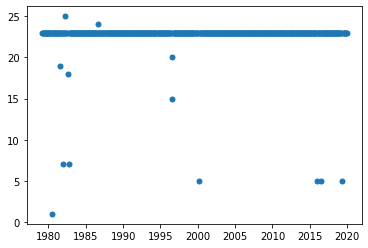

In [ ]:
# By Month
plt.plot(graf.date, graf.Topic_FREX, linewidth=0, markersize=5, marker='o')

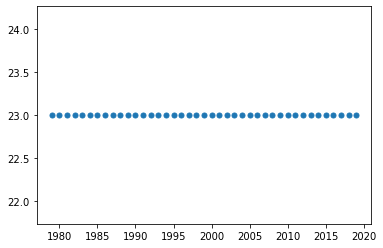

In [ ]:
# By Year
graf=base.groupby(['Year'], as_index=False)['Topic_FREX'].agg(get_mode_list)
plt.plot(graf.Year, graf.Topic_FREX, linewidth=0, markersize=5, marker='o')

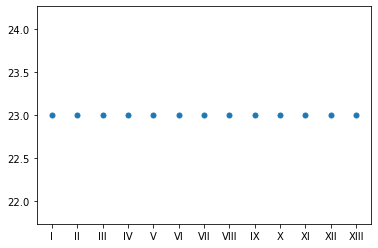

In [ ]:
# By Legislatura
graf=base.groupby(['legislatura'], as_index=False)['Topic_FREX'].agg(get_mode_list)
graf['id']=[1,2,3,4,9,5,6,7,8,10,11,12,13]
graf=graf.sort_values('id')
plt.plot(graf.legislatura, graf.Topic_FREX, linewidth=0, markersize=5, marker='o')

Ahora para weights

In [ ]:
base['Topic_weight'].unique()

array([ 9, 26, 13,  1, 24,  8, 23, 15, 21, 22, 20, 14, 28, 10, 30,  4, 29,
        7, 25, 11,  2,  5,  3, 17, 27, 12, 19,  6, 16, 18])

In [ ]:
graf=base.groupby(['Year', 'Month'], as_index=False)['Topic_weight'].agg(get_mode_list)
graf['date'] = graf.apply(lambda x: datetime.datetime(x['Year'], x['Month'], 1), axis=1)

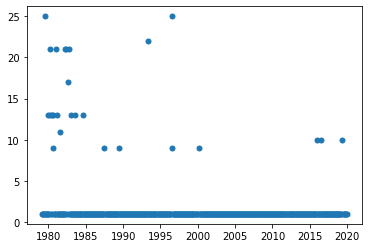

In [ ]:
# By Month
plt.plot(graf.date, graf.Topic_weight, linewidth=0, markersize=5, marker='o')

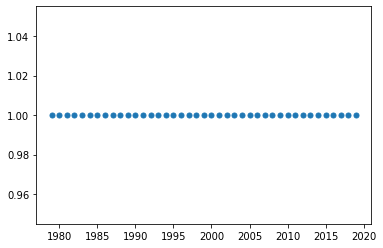

In [ ]:
# By Year
graf=base.groupby(['Year'], as_index=False)['Topic_weight'].agg(get_mode_list)
plt.plot(graf.Year, graf.Topic_weight, linewidth=0, markersize=5, marker='o')

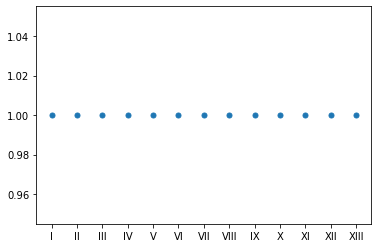

In [ ]:
# By Legislatura
graf=base.groupby(['legislatura'], as_index=False)['Topic_weight'].agg(get_mode_list)
graf['id']=[1,2,3,4,9,5,6,7,8,10,11,12,13]
graf=graf.sort_values('id')
plt.plot(graf.legislatura, graf.Topic_weight, linewidth=0, markersize=5, marker='o')